In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import math

Text(0, 0.5, 'Concentration')

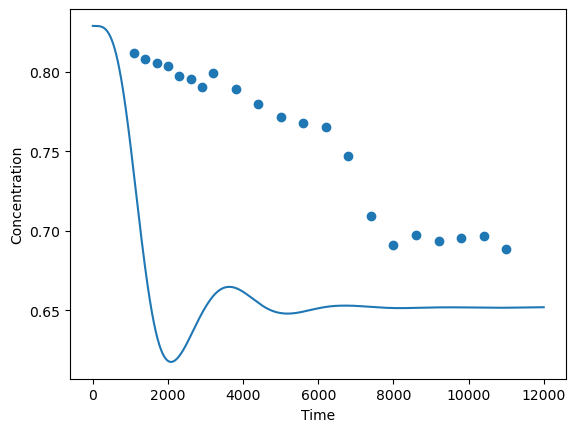

In [3]:
def generateODE4(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.8287                     # gm/(100 gm of mixed solvent)
    Ce = 0.5779                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    A1= 0.001
    g1= 1.3674422124010206
    A2= 0.001
    g2= 0.8806401378356327
    kb= 1.0159735378591962
    b= 0.11727791169769848
    
    f = 2.5 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc
    
        
    return [dm00, dm10, dm01, dm11, dc]
t_span4 = (0, 12000)  # Adjust this to match the maximum time in your data
num_points4 = 12000
initialConditions4 = [0, 0, 0, 0, 0.8287]
sol4 = solve_ivp(
    lambda t, m: generateODE4(t, m),
    t_span4,
    initialConditions4,
    t_eval=np.linspace(t_span4[0], t_span4[1], num_points4)
)
Time4 = [1100,1400,1700,2000,2300,2600,2900,3200,3800,4400,5000,5600,6200,6800,7400,8000,8600,9200,9800,10400,11000]
Concentration4 = [0.8119074939,0.8080550257,0.8056126769,0.8037800776,0.7971050414,0.7952981708,0.7901365596,0.7988397723,0.7892703199,0.7799543858,0.7717273711,0.7678655099,0.7654176994,0.7467064548,0.7093724843,0.6910878323,0.6976557697,0.6933652931,0.6956656918,0.6965078415,0.6884784269]
plt.scatter(Time4, Concentration4)
plt.plot(sol4.t,sol4.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")